### Part 1

In [1]:
# import necessary packages
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore" , category=DeprecationWarning)

%matplotlib inline

In [2]:
# loading training data set
train=pd.read_csv("train.csv")
train_original=train.copy

In [3]:
train


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
# loading test data set
test=pd.read_csv("test.csv")
test_original=test.copy()

In [5]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [6]:
# combine train and test data sets
combine=train.append(test,ignore_index=True,sort=True)


In [7]:
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [8]:
def remove_pattern(text,pattern):
    r=re.findall(pattern,text)
    
    for i in r:
        text=re.sub(i,"",text)
    return text

In [9]:
# removing @user from all tweets
combine['new_tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,new_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
combine

,id,label,tweet,new_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


In [11]:
# removing special characters
combine['new_tweets']=combine['new_tweets'].str.replace("[^a-zA-A#]"," ",regex=True)
combine

,id,label,tweet,new_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...


In [12]:
# removing short words - here words less than 3 letters
combine['new_tweets']=combine['new_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
combine

,id,label,tweet,new_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


In [13]:
# tokenization
token_tweets=combine['new_tweets'].apply(lambda x:x.split())
token_tweets


0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: new_tweets, Length: 49159, dtype: object

In [14]:
# stemming
from nltk import PorterStemmer
ps=PorterStemmer()
token_tweets=token_tweets.apply(lambda x:[ps.stem(i) for i in x])
token_tweets

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: new_tweets, Length: 49159, dtype: object

In [15]:
# join the tokens again back to the sentence or text
for i in range(len(token_tweets)):
    token_tweets[i]=' '.join(token_tweets[i])
combine['new_tweets']=token_tweets
combine

,id,label,tweet,new_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


### Data visualization part

In [16]:
# function to extract hashtags from the tweet
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        h=re.findall(r'#(\w+)',i)
        hashtags.append(h)
    return hashtags

In [17]:
# hashtags for positive reviews
positive_ht=hashtag_extract(combine['new_tweets'][combine['label']==0])

In [18]:
positive_ht

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [19]:
# hashtags for negative reviews
negative_ht=hashtag_extract(combine["new_tweets"][combine["label"]==1])

In [20]:
negative_ht

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [21]:
# unnest the list
positive_ht=sum(positive_ht,[])
negative_ht=sum(negative_ht,[])

In [22]:
positive_ht

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [23]:
negative_ht

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

- for postive tweets

In [24]:
# counting the frequency of the +ve words (hashtags)
positive_freq=nltk.FreqDist(positive_ht)
positive_freq

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [25]:
# creating data frame for the words with their frequency
df_positive=pd.DataFrame({'hashtags':list(positive_freq.keys()),'count':
                          list(positive_freq.values())})
df_positive

,hashtags,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


- for negative tweets

In [26]:
# counting the frequency of negative words(hashtags) 
negative_freq=nltk.FreqDist(negative_ht)
negative_freq

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [27]:
# creating data frame with frequencies
df_negative=pd.DataFrame({'hashtags':list(negative_freq.keys()),'count':list(negative_freq.values())})
df_negative

,hashtags,count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


<AxesSubplot:xlabel='count', ylabel='hashtags'>

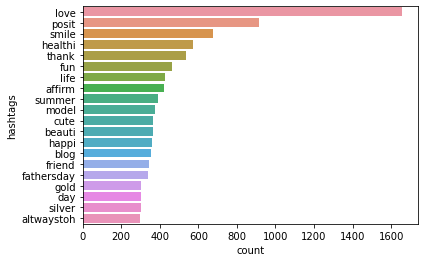

In [28]:

sns.barplot(data=df_positive.nlargest(20,columns='count'),y='hashtags',x='count')

<AxesSubplot:xlabel='count', ylabel='hashtags'>

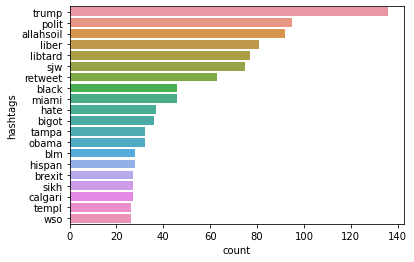

In [29]:

sns.barplot(data=df_negative.nlargest(20,columns='count'),y='hashtags',x='count')

## Part 2

In [30]:
# applying bag of words feature extraction
from sklearn.feature_extraction.text import CountVectorizer

bag_of_words=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english').fit_transform(combine['new_tweets'])
df_bag_of_words=pd.DataFrame(bag_of_words.todense())
df_bag_of_words

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# applying TF-IDF feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english').fit_transform(combine['new_tweets'])
df_tfidf=pd.DataFrame(tfidf.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- splitting dataset into train and validation

In [32]:
# using features from bag of words for training set
train_bagofwords=bag_of_words[:31962].todense()
train_bagofwords

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# using features from tfidf for training set
train_tfidf=tfidf[:31962].todense()
train_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# splitting data for bag of words features
from sklearn.model_selection import train_test_split
x_train_bgwords,x_valid_bgwords,y_train_bgwords,y_valid_bgwords=train_test_split(train_bagofwords,train['label'],test_size=0.3,random_state=2)

In [35]:
# splitting data for tfidf features 
# already imported train_test_split
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf=train_test_split(train_tfidf,train['label'],test_size=0.3,random_state=17)

## Part 3 

- Machine learning models
  - Logistic Regression
  - Decesion Tree

In [36]:

from sklearn.metrics import f1_score

- Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logis_reg=LogisticRegression(random_state=0,solver='lbfgs')

In [38]:
# fitting bag of words features
logis_reg.fit(x_train_bgwords,y_train_bgwords)

predict_bgwords=logis_reg.predict_proba(x_valid_bgwords)
predict_bgwords

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [39]:
# calculating f1_score
predict1=predict_bgwords[:,1]>=0.3
predict1=predict1.astype(np.int)
predict1
logist_bgwords_score=f1_score(y_valid_bgwords,predict1)
print("F1 score of Logistic Regression with Bag of words features :",logist_bgwords_score)

F1 score of Logistic Regression with Bag of words features : 0.5721352019785655


In [40]:
# fitting tfidf features
logis_reg.fit(x_train_tfidf,y_train_tfidf)

predict_tfidf=logis_reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [41]:
# calculating F1 score 
predict2=predict_tfidf[:,1]>=0.3
predict2=predict2.astype(np.int)
predict2
logis_tfidf_score=f1_score(y_valid_tfidf,predict2)
print("F1 score of Logistic Regression with TFIDF features is:",logis_tfidf_score)

F1 score of Logistic Regression with TFIDF features is: 0.5862068965517241


- Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=1)

In [48]:
# fitiing decision tree model for bag of wwords feature
dtc.fit(x_train_bgwords,y_train_bgwords)

predict_bgwords_dt=dtc.predict_proba(x_valid_bgwords)
predict_bgwords_dt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [49]:
# calculating f1 score
predict3=predict_bgwords_dt[:,1]>=0.3
predict3=predict3.astype(np.int)
predict3
dtc_bgw_score=f1_score(y_valid_bgwords,predict3)
print("F1 score of decision tree with bag of words features is:",dtc_bgw_score)

F1 score of decision tree with bag of words features is: 0.5141776937618148


In [51]:
# fitting decision tree model for tfidf features
dtc.fit(x_train_tfidf,y_train_tfidf)

predict_tfidf_dtc=dtc.predict_proba(x_valid_tfidf)
predict_tfidf_dtc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [52]:
# calculating f1 score
predict4=predict_tfidf_dtc[:,1]>=0.3
predict4=predict4.astype(np.int)
predict4
dtc_tfidf_score=f1_score(y_valid_tfidf,predict4)
print("F1 score of Decision tree with TFIDF features is:",dtc_tfidf_score)

F1 score of Decision tree with TFIDF features is: 0.5498821681068342


## Part 4

- Model comparision

In [56]:
# comparing bag of words f1 score on different models used
models=['Logistic Regression','Decision Tree']
score1=[logist_bgwords_score,dtc_bgw_score]
compare1=pd.DataFrame({'Model':models,'F1Score for BagOfWords':score1},index=[i for i in range(1,3)])
compare1

,Model,F1Score for BagOfWords
1,Logistic Regression,0.572135
2,Decision Tree,0.514178


In [57]:
# comparing tfidf f1 score on different models used
models_=['Logistic Regression','Decision Tree']
score2=[logis_tfidf_score,dtc_tfidf_score]
compare2=pd.DataFrame({'Model':models_,'F1Score for TFIDF':score2},index=[i for i in range(1,3)])
compare2

,Model,F1Score for TFIDF
1,Logistic Regression,0.586207
2,Decision Tree,0.549882


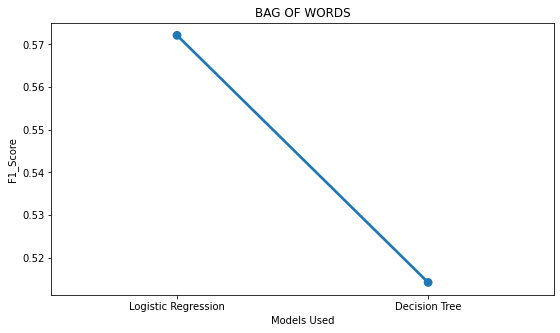

In [62]:
# comparision graph for Bag of words
plt.figure(figsize=(9,5))
sns.pointplot(x='Model',y='F1Score for BagOfWords',data=compare1)
plt.xlabel('Models Used')
plt.ylabel('F1_Score')
plt.title("BAG OF WORDS")
plt.show()

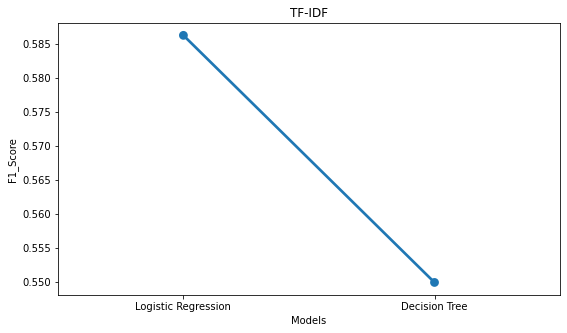

In [64]:
# comparision graph for Logistic Regression
plt.figure(figsize=(9,5))
sns.pointplot(x='Model',y='F1Score for TFIDF',data=compare2)
plt.xlabel("Models")
plt.ylabel("F1_Score")
plt.title("TF-IDF")
plt.show()

In [65]:
tech=['Bag of Words','TF-IDF']
score3=[logist_bgwords_score,logis_tfidf_score]
compare3=pd.DataFrame({'Technique':tech,'F1_Score':score3},index=[i for i in range(1,3)])
compare3

,Technique,F1_Score
1,Bag of Words,0.572135
2,TF-IDF,0.586207


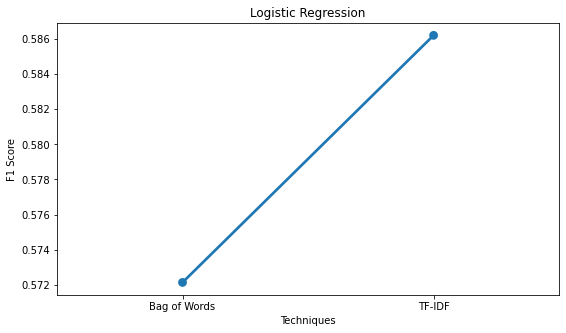

In [66]:
# comparision graph
plt.figure(figsize=(9,5))
sns.pointplot(x='Technique',y='F1_Score',data=compare3)
plt.xlabel('Techniques')
plt.ylabel('F1 Score')
plt.title('Logistic Regression')
plt.show()

In [69]:
# Prediction the results
pred_res=logis_reg.predict_proba(tfidf[31962:])
pred_res=pred_res[:,1]>=0.3
pred_res=pred_res.astype(np.int)
test['label']=pred_res
test[['id','label']].to_csv('result.csv',index=False)

In [70]:
df=pd.read_csv('result.csv')

In [71]:
df

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
